In [2]:
from legend_plot_style import LEGENDPlotStyle as lps
lps.use("legend_talks")
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math
from collections import Counter

file_path = '/home/eric/sim/WWLegend/Archive/Neutrontaggerruns/'
""" Amount is required to know how many entries belong to each neutron. 
    nPMMA is an array where each entry says how many photon timestamp belong to that neutron.
    Time for the time entries. Each entry is one photon timestamp.
    no is required to match Shower IDs, Identifier for something else.
    Read in 2 different setups to compare!"""
identifierPMMA, x1, y1, z1, bruh, bruh2 = np.loadtxt(file_path + "Warwick without ArgonModerator/PMMARun.txt", dtype=float, delimiter=',', unpack=True)
identifierPMMA2, x2, y2, z2, bruh, bruh2 = np.loadtxt(file_path + "Warwick with ArgonModerator/PMMARun.txt", dtype=float, delimiter=',', unpack=True) #second name

name1= "No ArgonModerator"  # belongs to "first" read in setup
name2 = "With ArgonModerator" # belongs to "second" read in setup

In [36]:
radius1 = np.sqrt(x1*x1 + y1 * y1)
radius2 = np.sqrt(x2*x2 + y2*y2)
radius1GdOnly = radius1[(identifierPMMA) == 3 | (identifierPMMA == 0)]
radius1Honly = radius1[identifierPMMA == 1]
radius1Wateronly = radius1[identifierPMMA != 4]
radius2GdOnly = radius2[(identifierPMMA2 == 3) | (identifierPMMA2 == 0)]
radius2Honly = radius2[identifierPMMA2 == 1]
radius2Wateronly = radius2[identifierPMMA2 != 4]

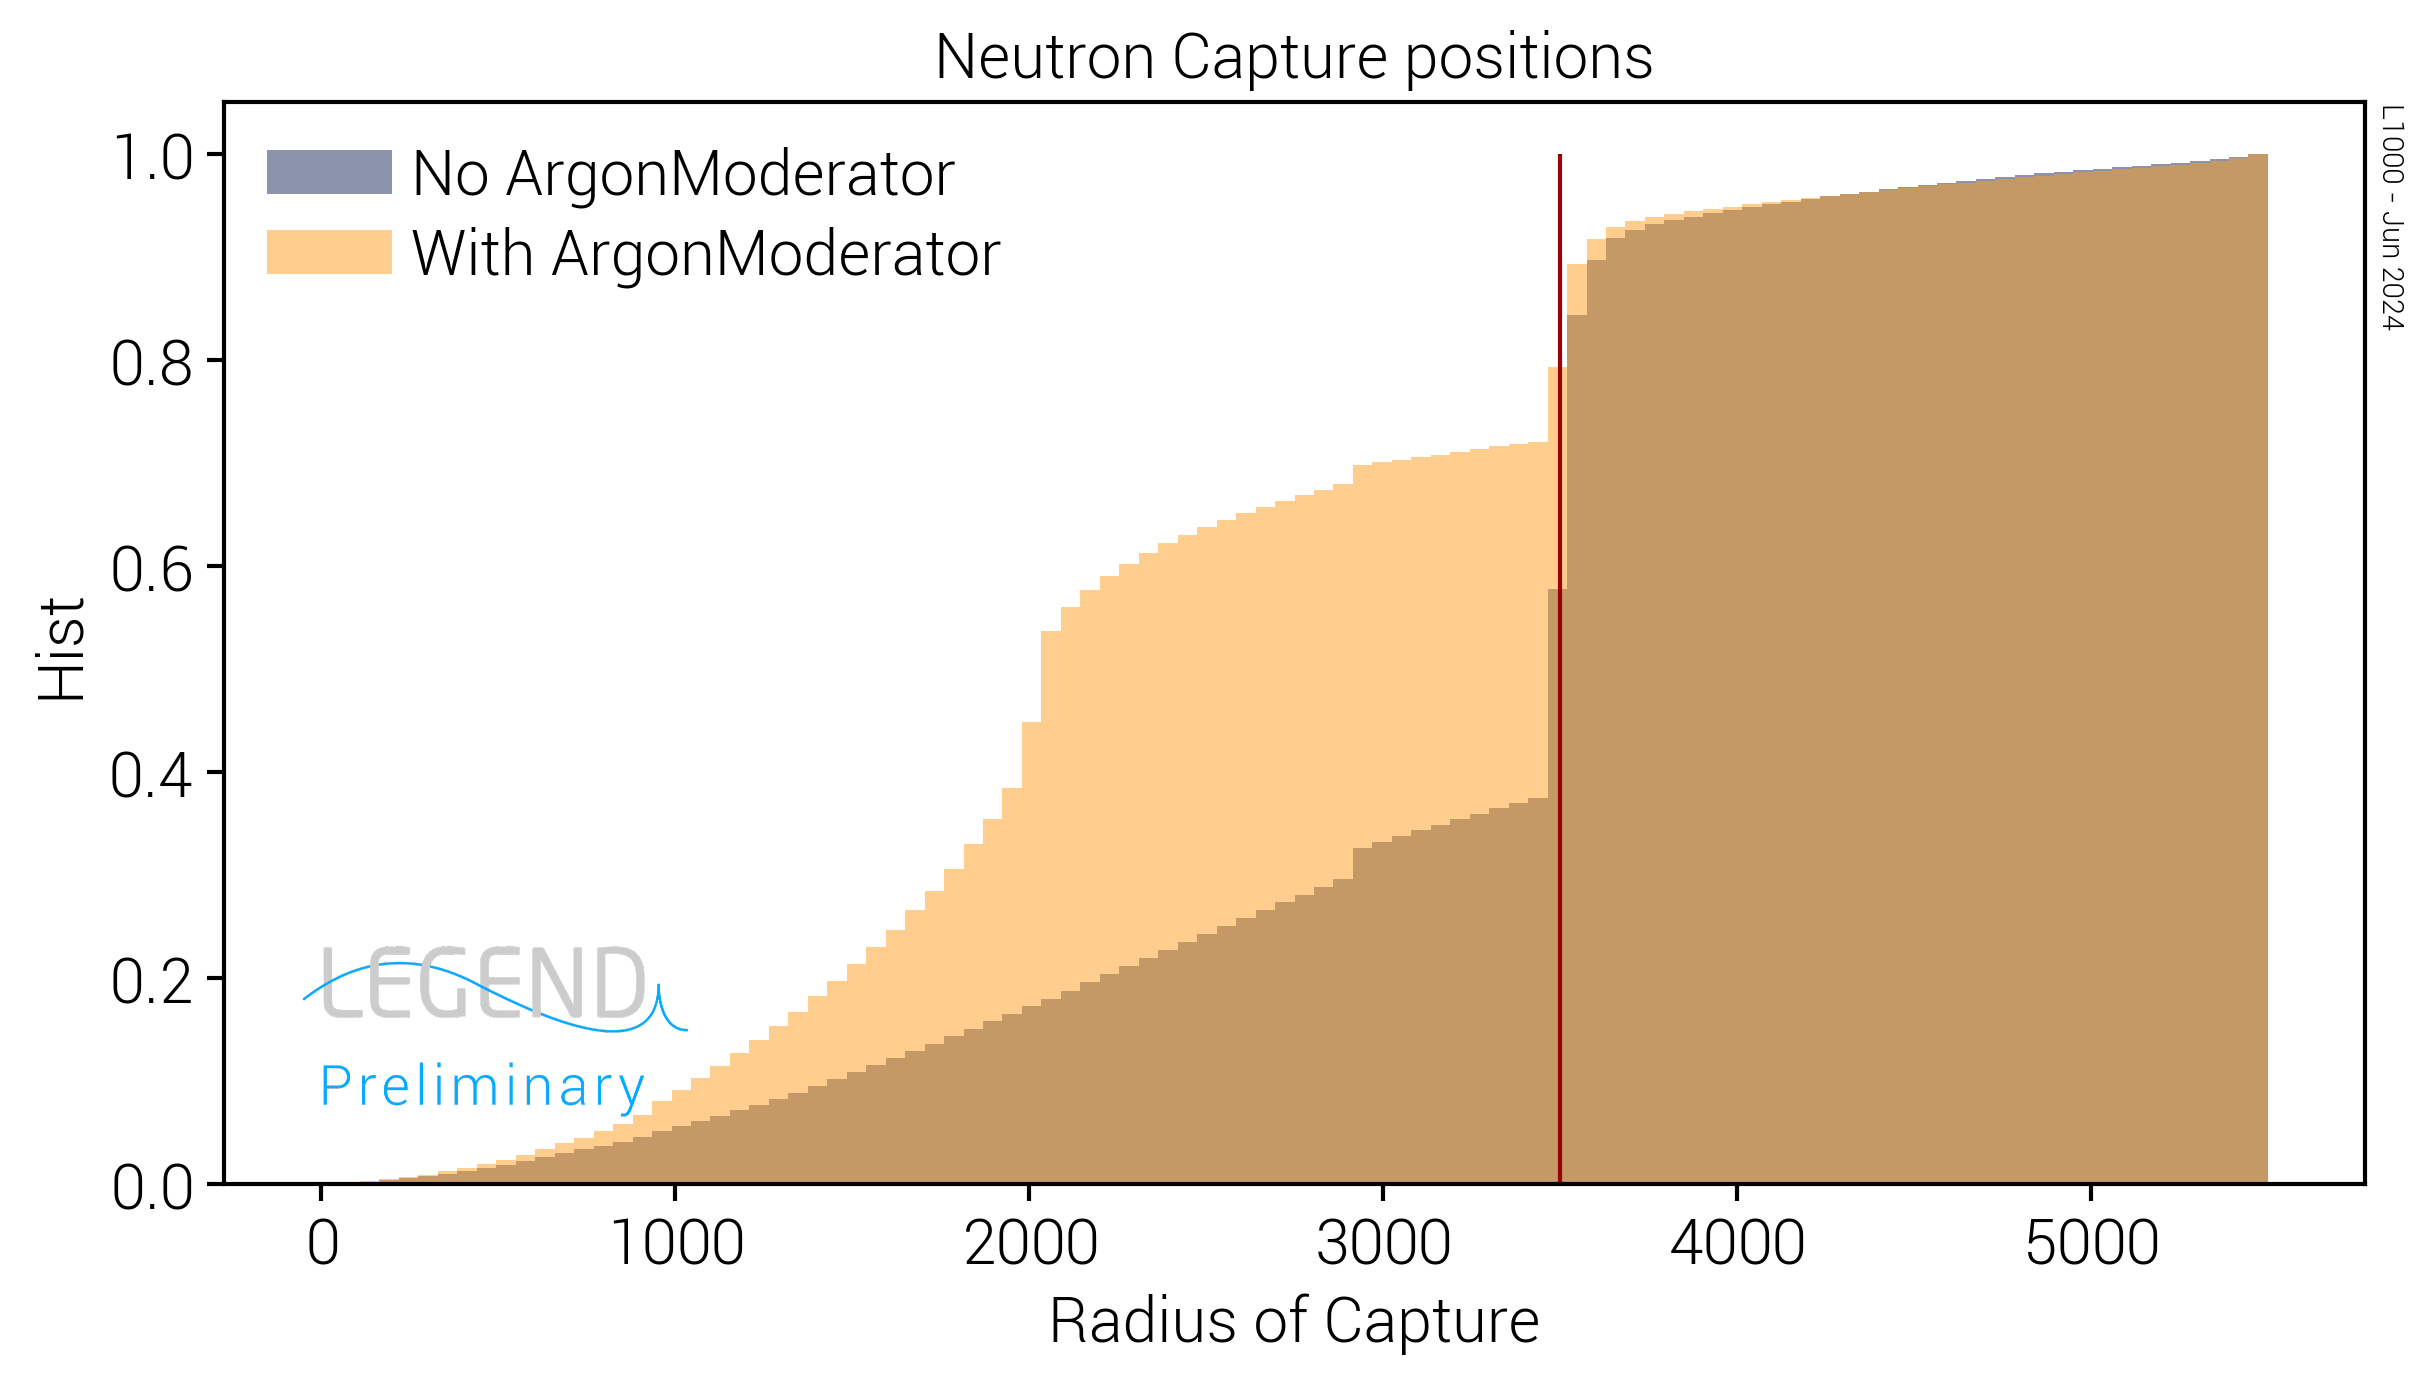

In [25]:
fig, ax1 = plt.subplots()
ax1.hist(radius1, bins = 100, range= (0, 5500), label= name1, cumulative=True, density= True, alpha= 0.5,color=lps.colors["legend_darkblue"])
ax1.hist(radius2, bins = 100, range= (0, 5500), label= name2, cumulative=True, density= True, alpha= 0.5, color=lps.colors["legend_orange"])

ax1.set_xlabel('Radius of Capture')
ax1.set_ylabel('Hist')
ax1.set_title('Neutron Capture positions')
ax1.legend(loc= "upper left")
ax1.set_legend_logo(position="lower left")
ax1.set_legend_annotation()
ax1.vlines(ymax=1, ymin=0, x=(3500), color=lps.colors["darkred"])
#ax1.grid()
#plt.savefig("/home/eric/sim/WWLegend/Plots/NeutronPositions.png")
plt.show()

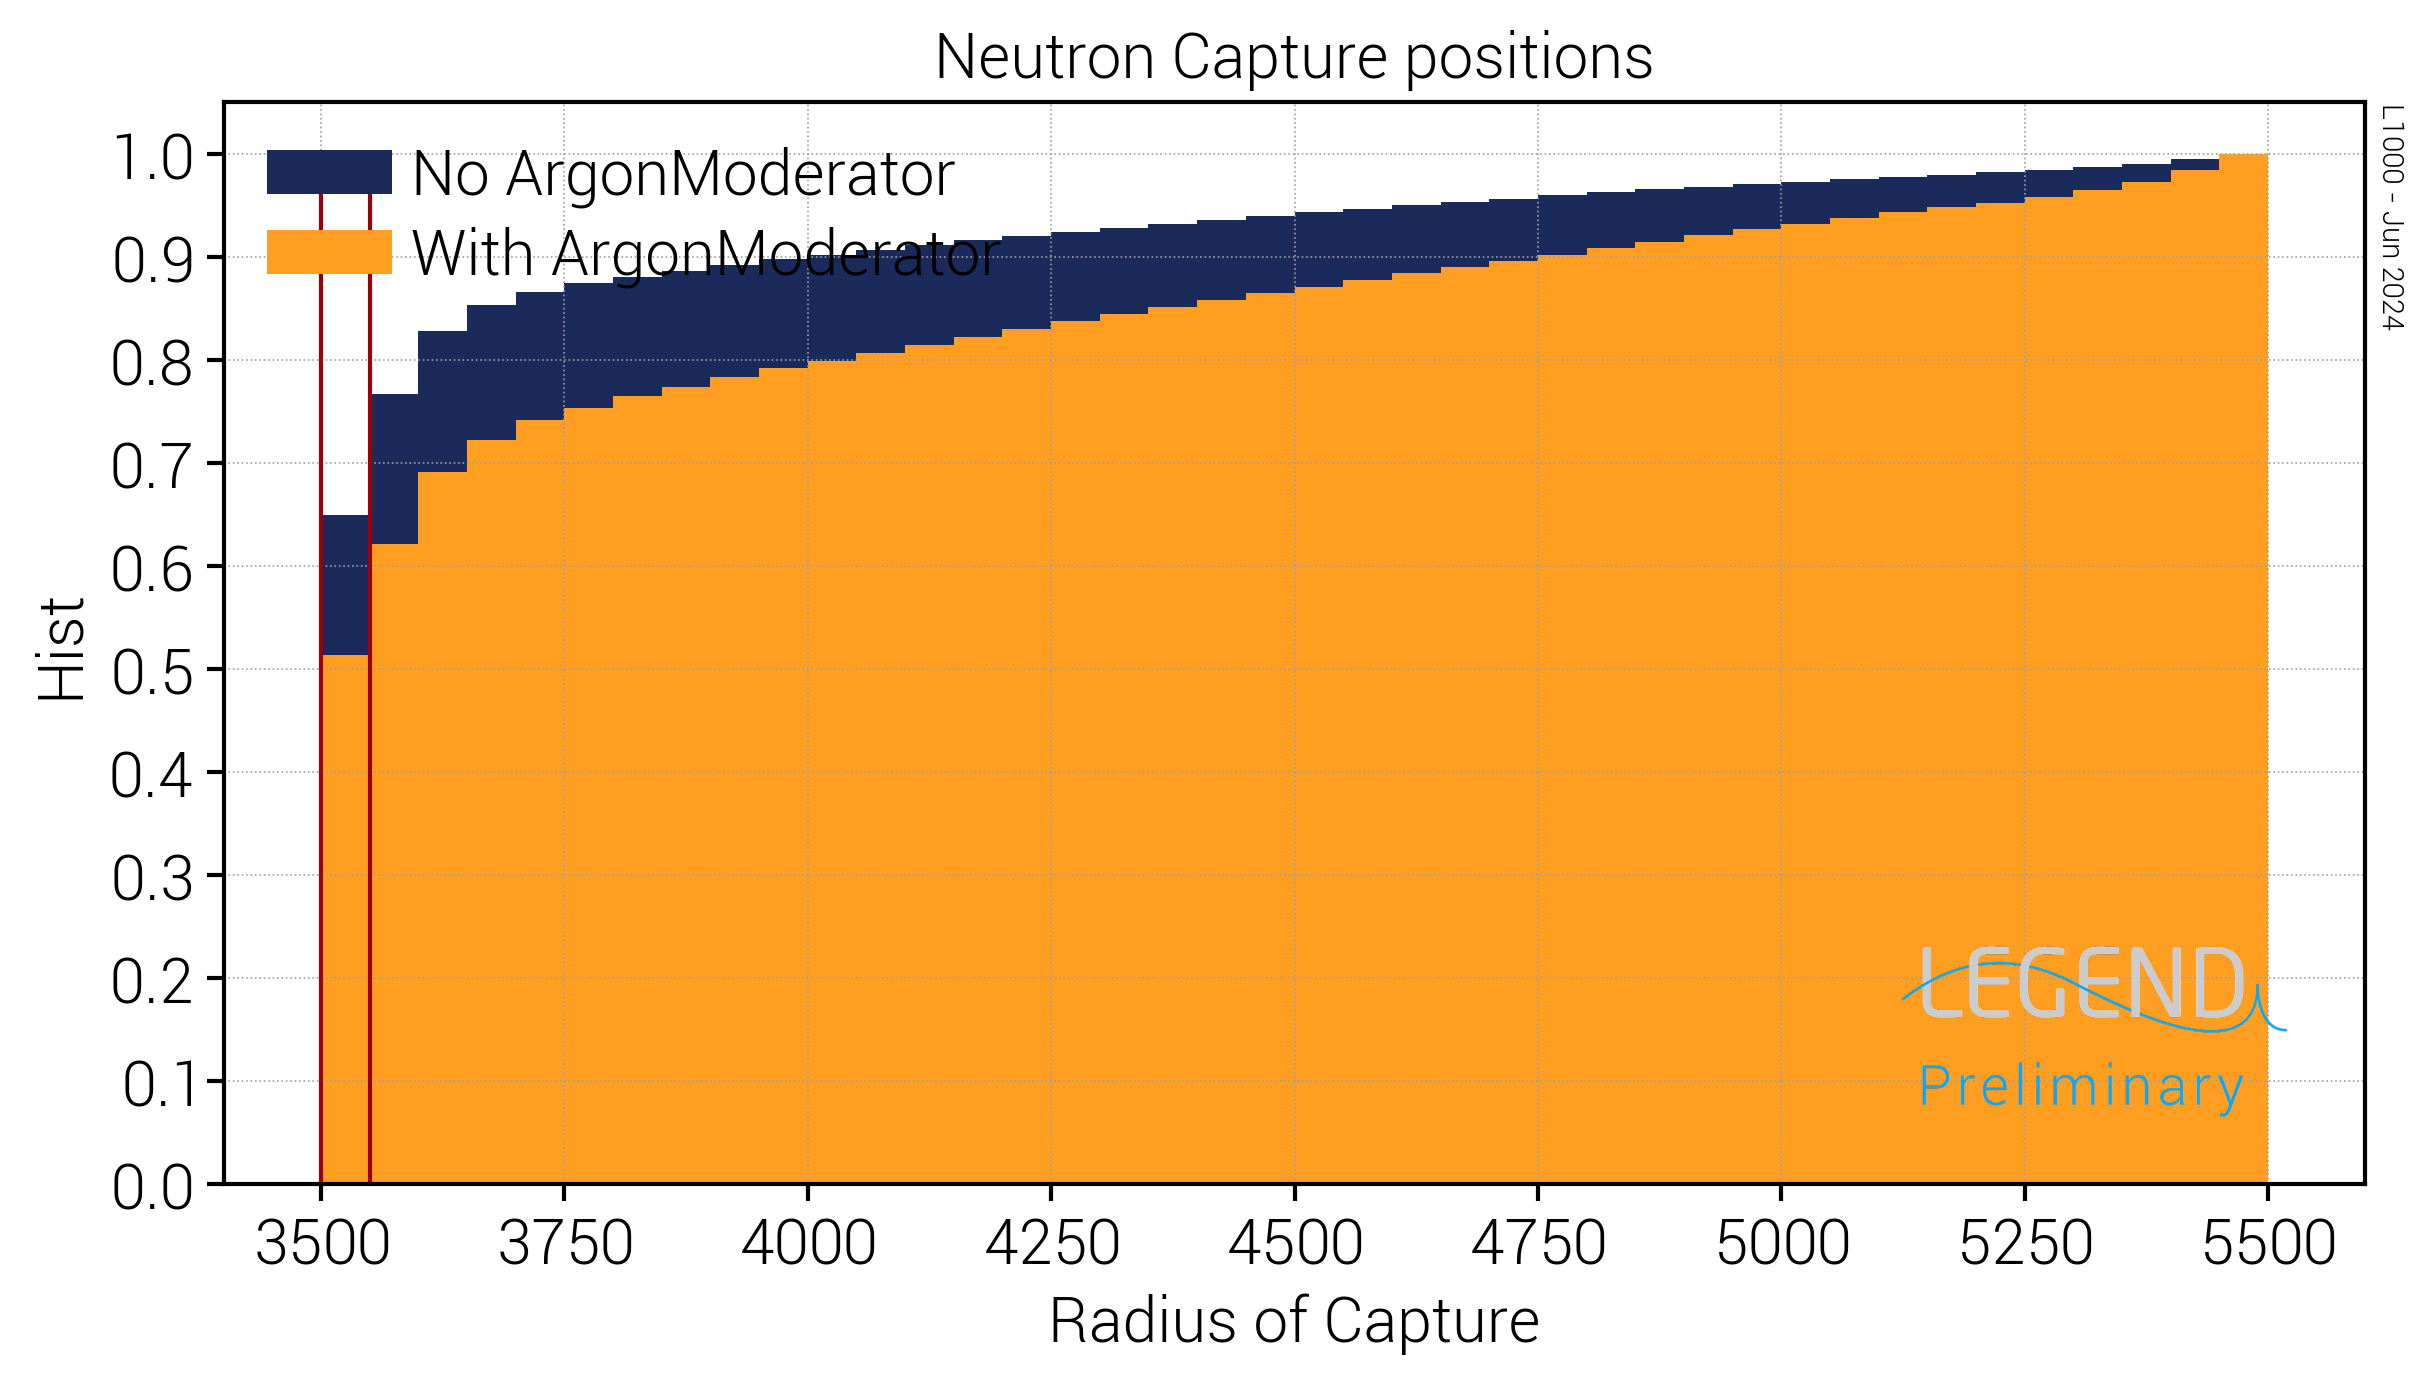

In [31]:
fig, ax1 = plt.subplots()
ax1.hist(radius1, bins = 40, range= (3500, 5500), label= name1, cumulative=True, density= True, color=lps.colors["legend_darkblue"])
ax1.hist(radius2, bins = 40, range= (3500, 5500), label= name2, cumulative=True, density= True, color=lps.colors["legend_orange"])

ax1.set_xlabel('Radius of Capture')
ax1.set_ylabel('Hist')
ax1.set_title('Neutron Capture positions')
ax1.legend(loc= "upper left")
ax1.set_legend_logo(position="lower right")
ax1.set_legend_annotation()
ax1.vlines(ymax=1, ymin=0, x=(3500, 3550), color=lps.colors["darkred"])
ax1.grid()
#plt.savefig("/home/eric/sim/WWLegend/Plots/NeutronPositionsWater.png")
ax1.set_yticks(np.arange(0, 1.1, 0.1))
plt.show()

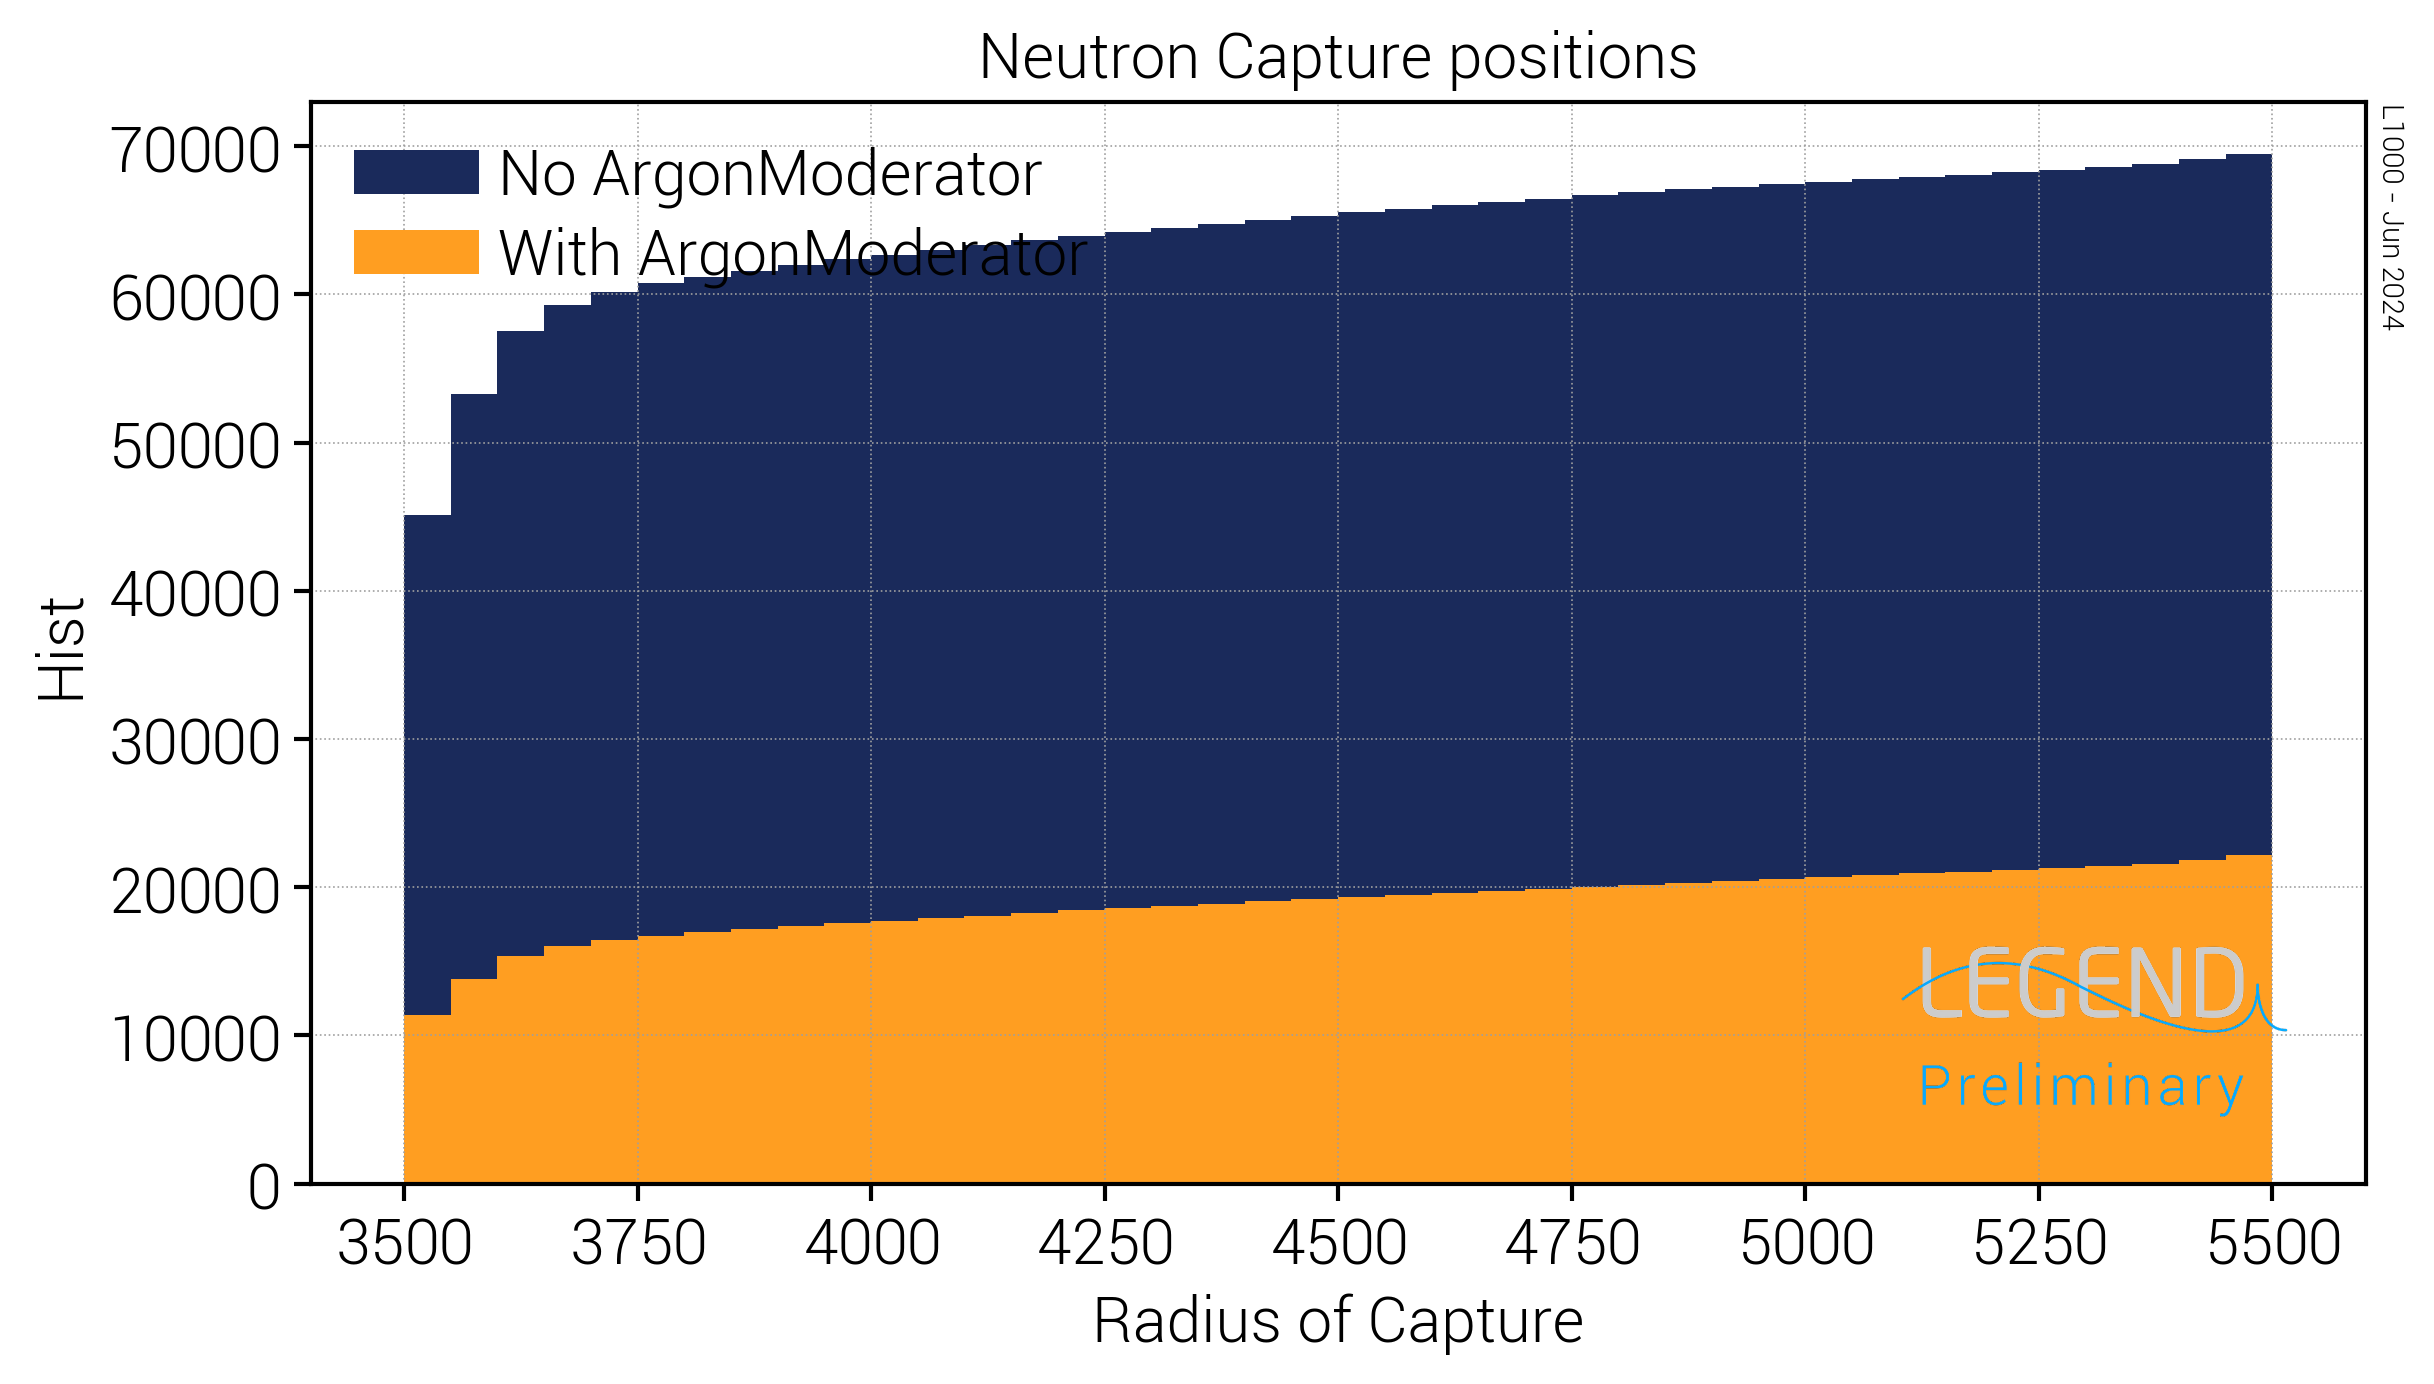

In [32]:
fig, ax1 = plt.subplots()
ax1.hist(radius1, bins = 40, range= (3500, 5500), label= name1, cumulative=True, color=lps.colors["legend_darkblue"])
ax1.hist(radius2, bins = 40, range= (3500, 5500), label= name2, cumulative=True, color=lps.colors["legend_orange"])

ax1.set_xlabel('Radius of Capture')
ax1.set_ylabel('Hist')
ax1.set_title('Neutron Capture positions')
ax1.legend(loc= "upper left")
ax1.set_legend_logo(position="lower right")
ax1.set_legend_annotation()
ax1.vlines(ymax=1, ymin=0, x=(3500, 3550), color=lps.colors["darkred"])
ax1.grid()
#plt.savefig("/home/eric/sim/WWLegend/Plots/NeutronPositionsWater.png")
plt.show()

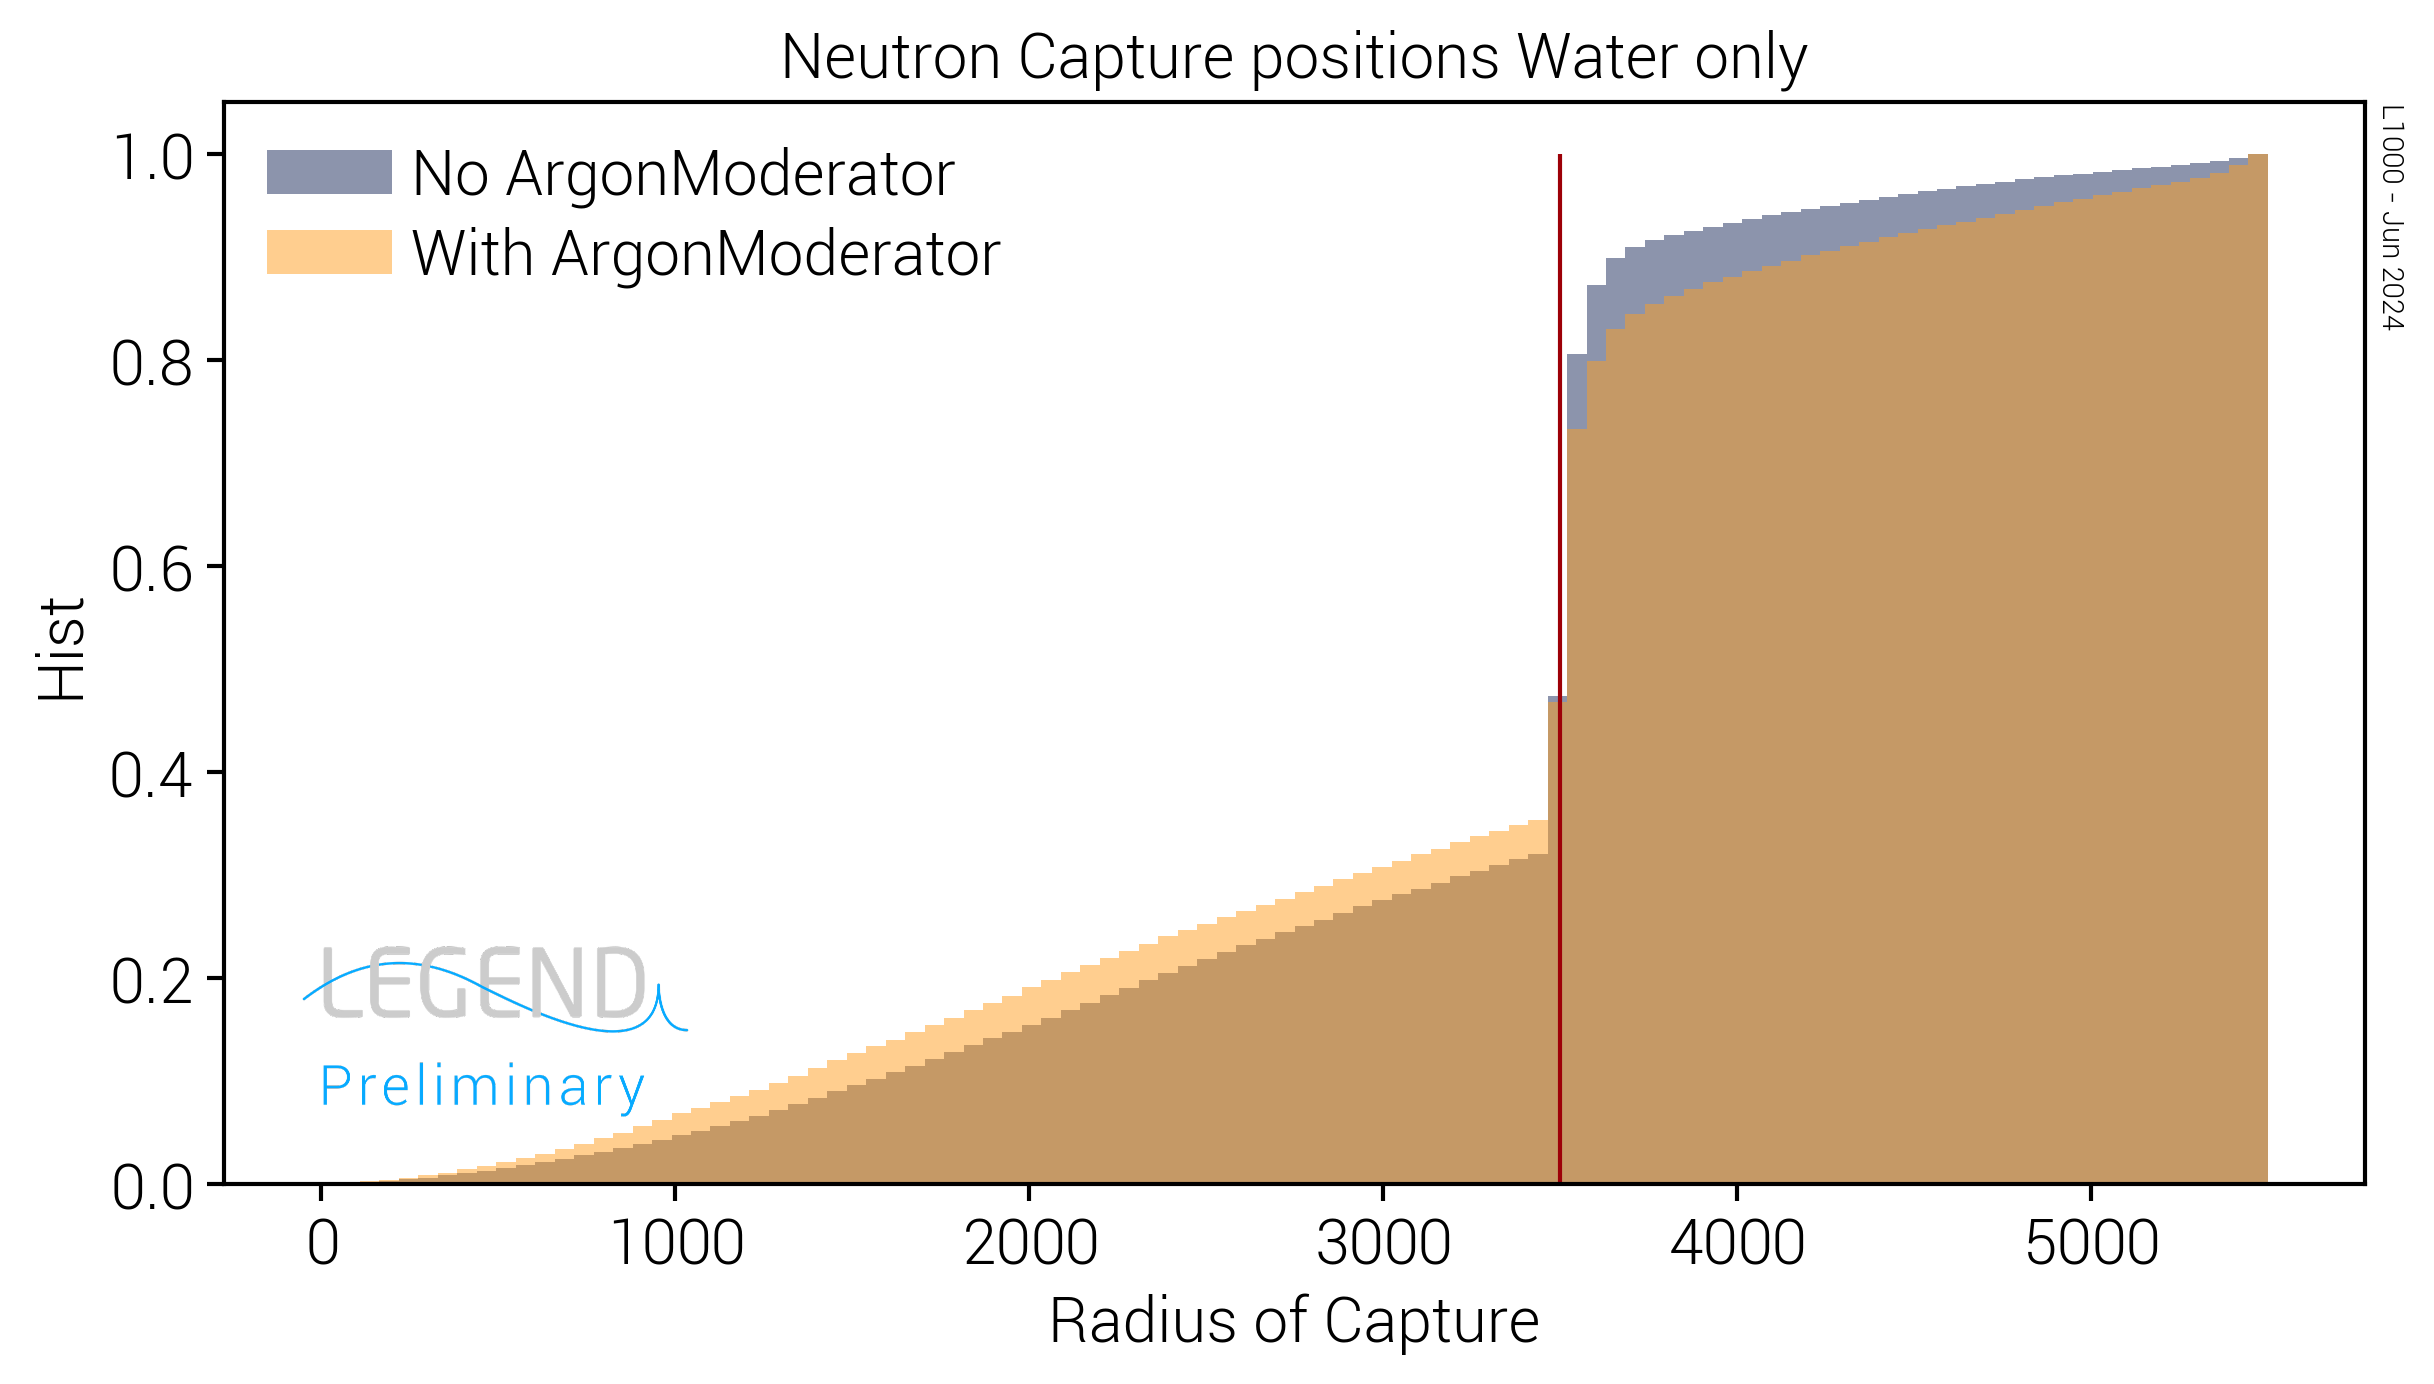

In [49]:
fig, ax1 = plt.subplots()
ax1.hist(radius1Wateronly, bins = 100, range= (0, 5500), label= name1, cumulative=True, density= True, alpha= 0.5,color=lps.colors["legend_darkblue"])
ax1.hist(radius2Wateronly, bins = 100, range= (0, 5500), label= name2, cumulative=True, density= True, alpha= 0.5, color=lps.colors["legend_orange"])

ax1.set_xlabel('Radius of Capture')
ax1.set_ylabel('Hist')
ax1.set_title('Neutron Capture positions Water only')
ax1.legend(loc= "upper left")
ax1.set_legend_logo(position="lower left")
ax1.set_legend_annotation()
ax1.vlines(ymax=1, ymin=0, x=(3500), color=lps.colors["darkred"])
#ax1.grid()
#plt.savefig("/home/eric/sim/WWLegend/Plots/NeutronPositionsWaterOnly.png")
plt.show()

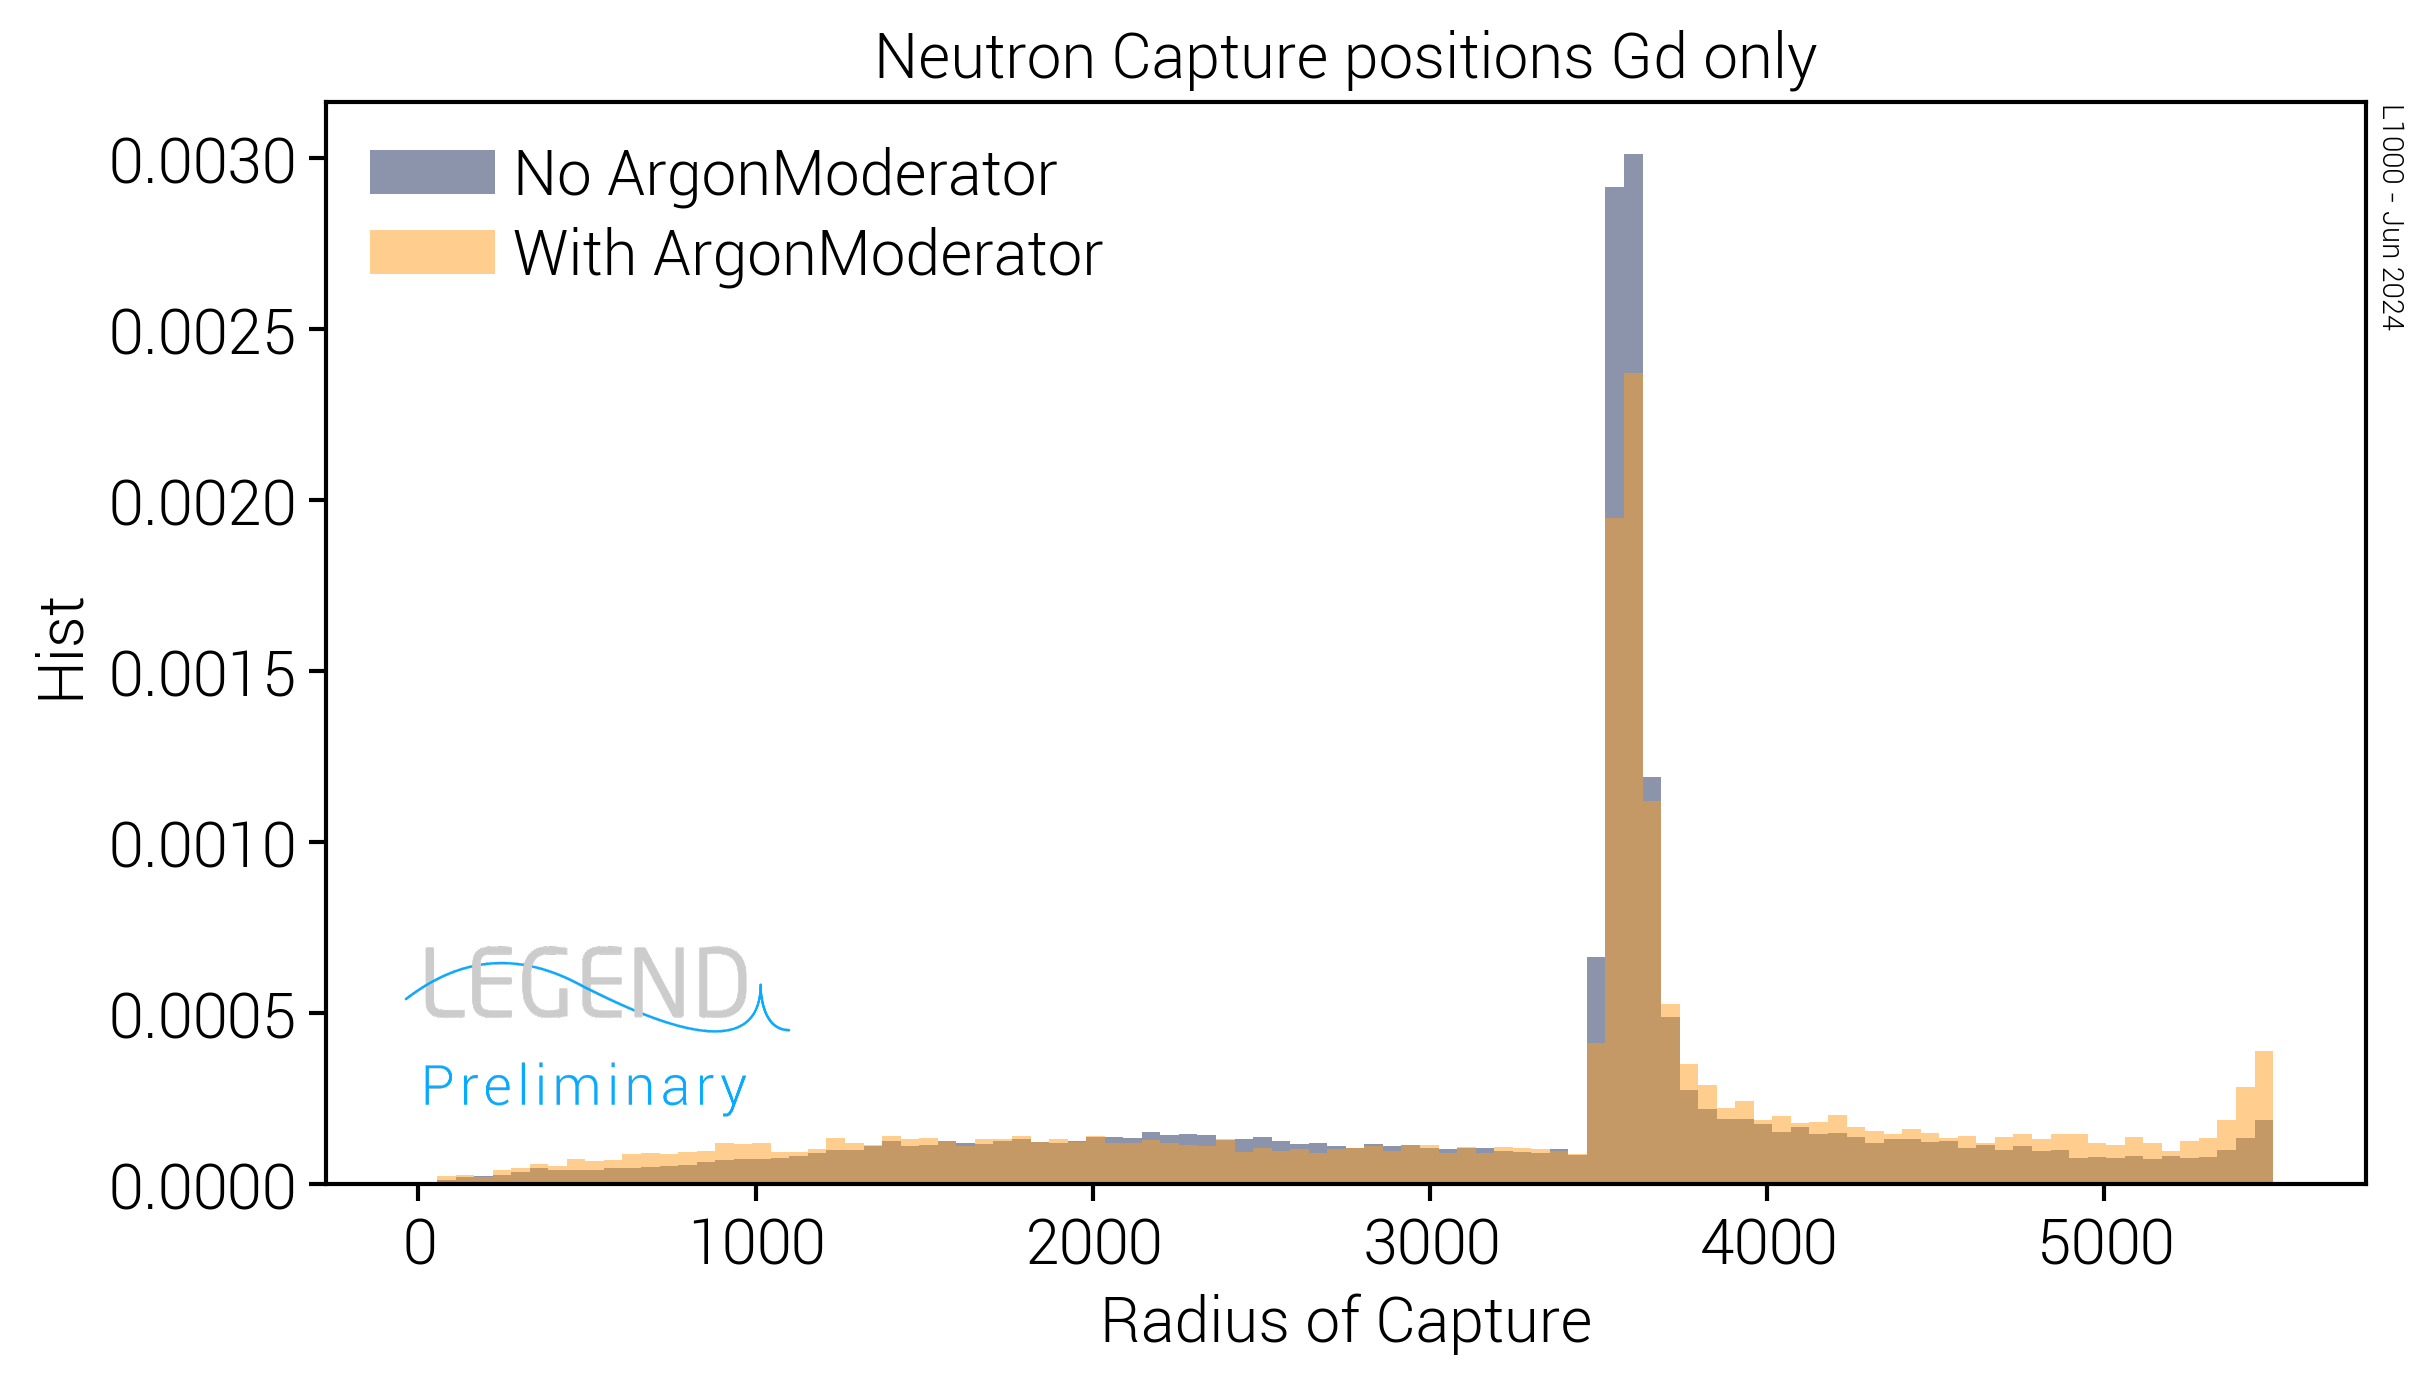

In [41]:
fig, ax1 = plt.subplots()
ax1.hist(radius1Honly, bins = 100, range= (0, 5500), label= name1, density= True, alpha= 0.5,color=lps.colors["legend_darkblue"])
ax1.hist(radius2Honly, bins = 100, range= (0, 5500), label= name2, density= True, alpha= 0.5, color=lps.colors["legend_orange"])

ax1.set_xlabel('Radius of Capture')
ax1.set_ylabel('Hist')
ax1.set_title('Neutron Capture positions Gd only')
ax1.legend(loc= "upper left")
ax1.set_legend_logo(position="lower left")
ax1.set_legend_annotation()
#ax1.vlines(ymax=1, ymin=0, x=(3500), color=lps.colors["darkred"])
#ax1.grid()
#plt.savefig("/home/eric/sim/WWLegend/Plots/NeutronPositions.png")
plt.show()

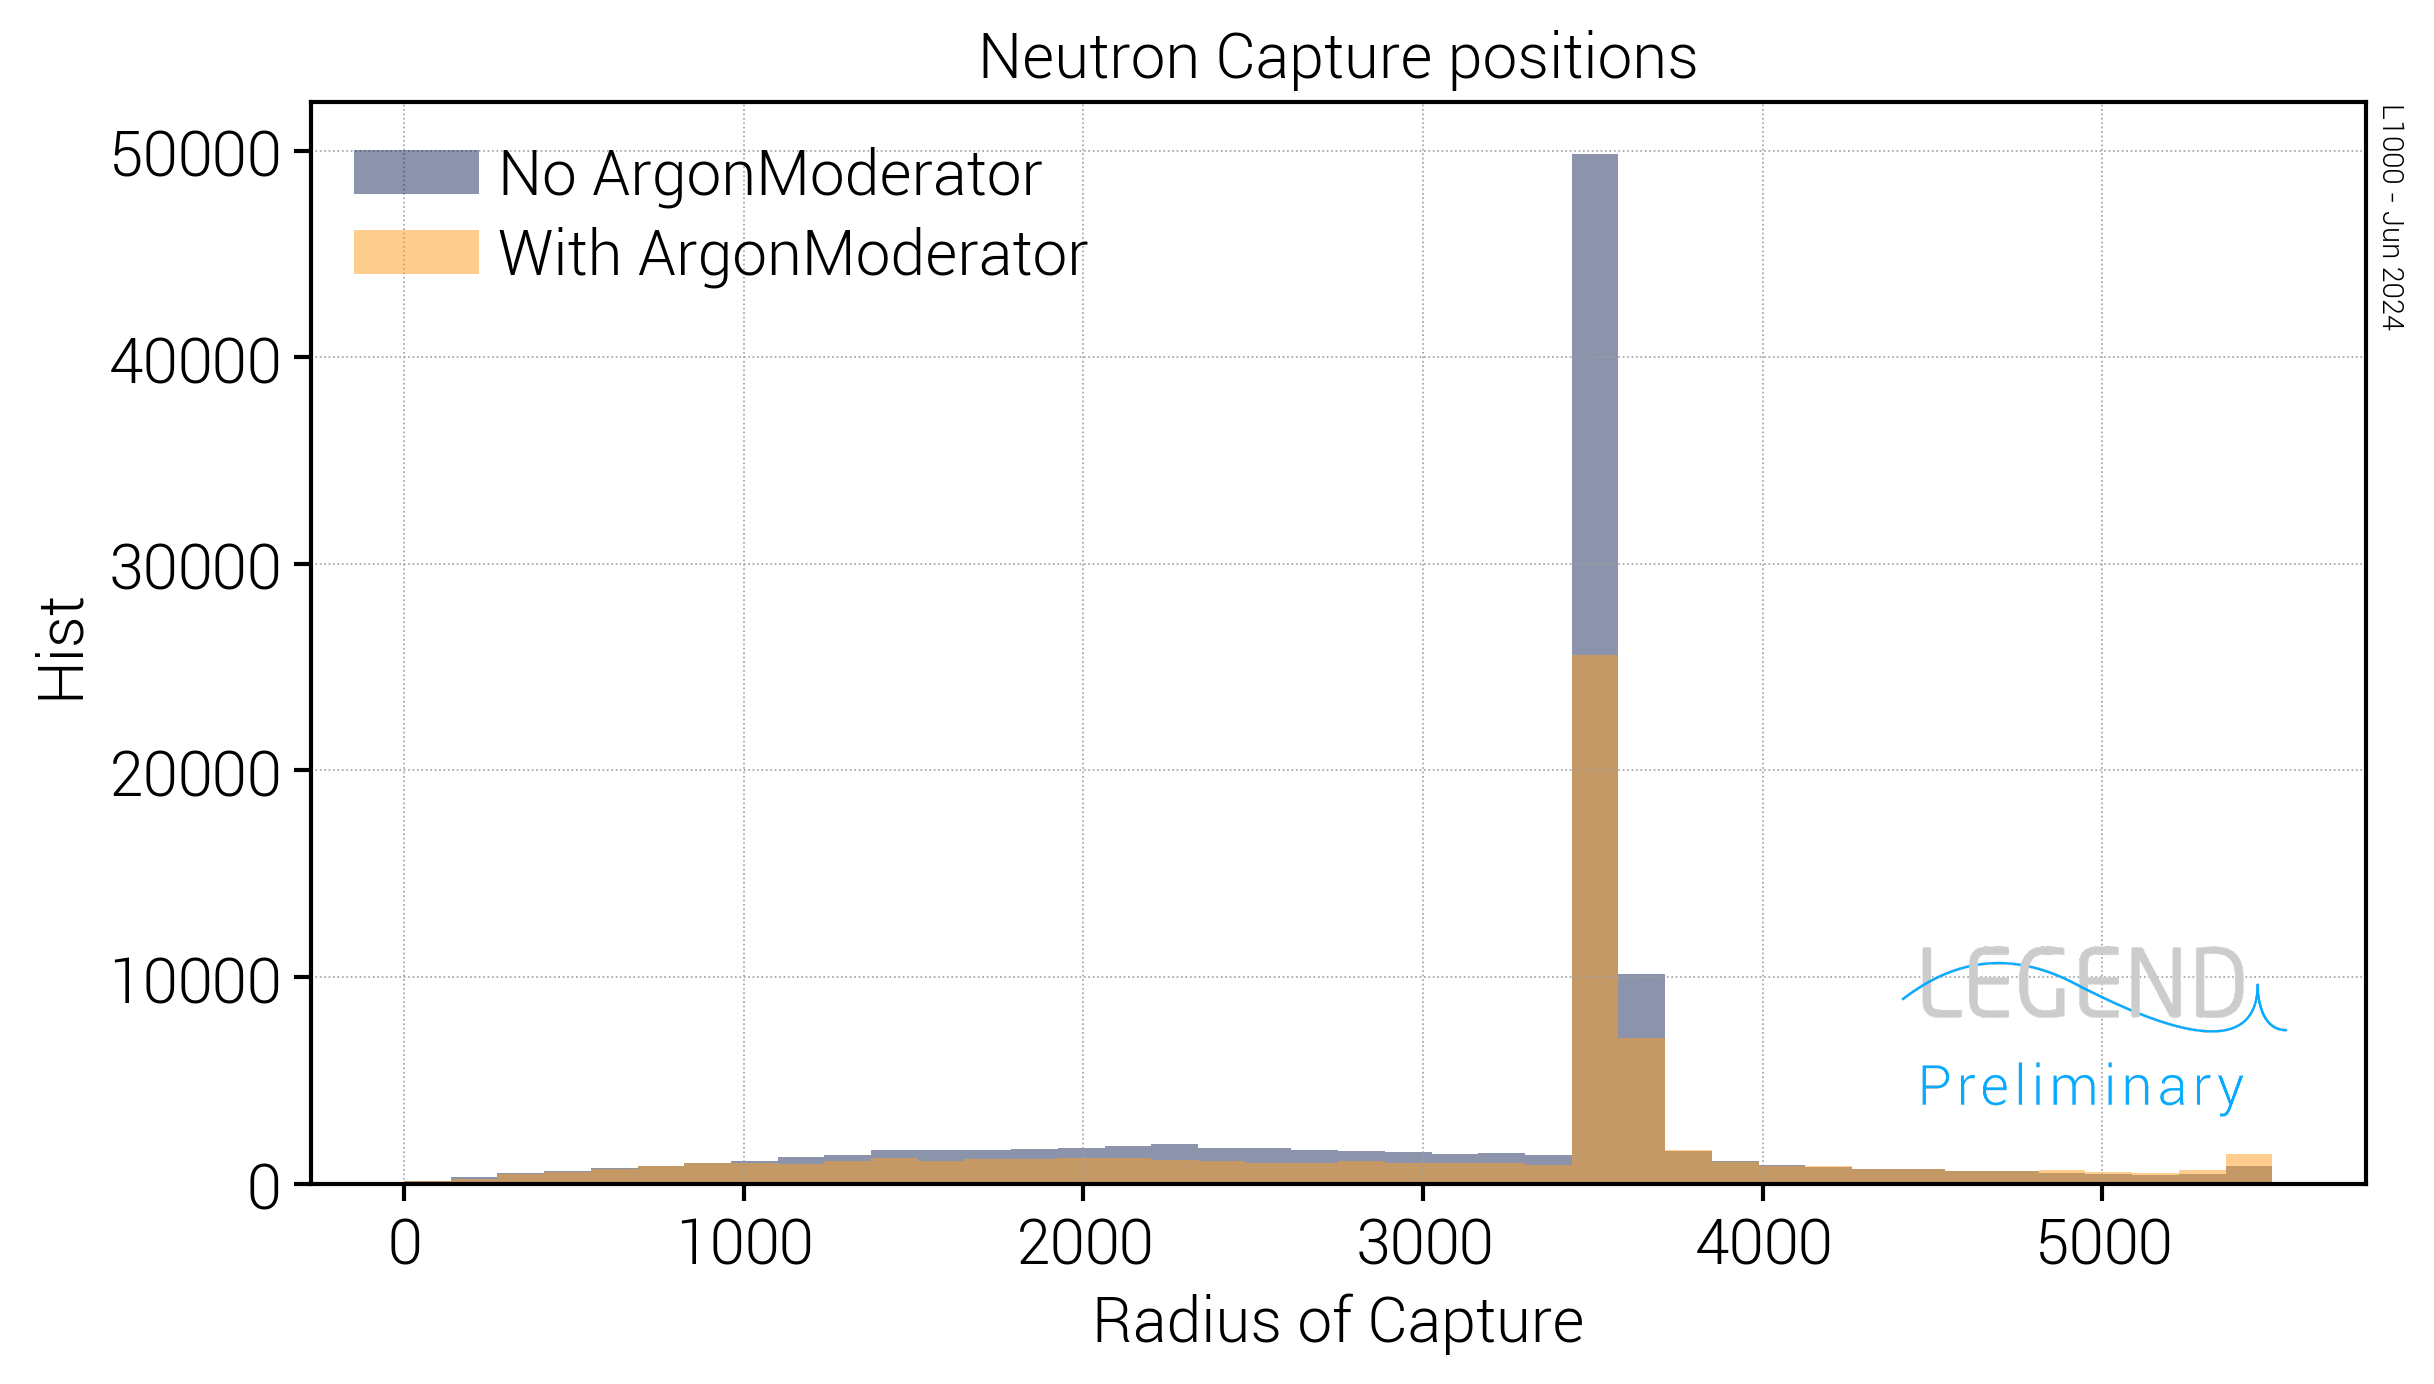

In [51]:
radius2SizeAdjusted = np.append(radius2Wateronly, radius2Wateronly)

fig, ax1 = plt.subplots()
ax1.hist(radius1Wateronly, bins = 40, range= (0, 5500), label= name1, alpha = 0.5, color=lps.colors["legend_darkblue"])
ax1.hist(radius2SizeAdjusted, bins = 40, range= (0, 5500), alpha = 0.5, label= name2, color=lps.colors["legend_orange"])

ax1.set_xlabel('Radius of Capture')
ax1.set_ylabel('Hist')
ax1.set_title('Neutron Capture positions')
ax1.legend(loc= "upper left")
ax1.set_legend_logo(position="lower right")
ax1.set_legend_annotation()
ax1.grid()
#plt.savefig("/home/eric/sim/WWLegend/Plots/NeutronPositionsWaterSizeAdjusted.png")
plt.show()